In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
class Mandelbrot:
    def __init__(self, c_density, n=10, x0=0) -> None:
        self.c_density = c_density
        self.n = 10
        self.x0 = x0
        self.data = {}

    def function(self, x, c):
        return x**2+c
    
    def fun_recursion(self, n, c, result):
        if len(result) == 0:
            result.append(self.x0)
        if len(result) == n:
            return result
        else:
            x =self.function(result[-1], c)
            result.append(x)
            return self.fun_recursion(n, c, result)
        
    
    def recursion(self, n, c):
        return self.fun_recursion(n, c, [])
    
    def run(self):
        real = np.linspace(-3, 3, self.c_density)
        imag = np.linspace(-2, 2, self.c_density)
        C = np.array([complex(r,i) for r in real for i in imag])
        for c in C:
            self.data[c] = self.recursion(self.n, c)[-1] < 10e10

    def plot(self, width, **kwargs):
        plt.style.use('dark_background')  # Set the dark background style
        phi = 1.4
        plt.figure(figsize=(width*phi, width))
        for key, is_finite in self.data.items():
            plt.scatter(key.real, key.imag, c='white' if is_finite else 'black', **kwargs)


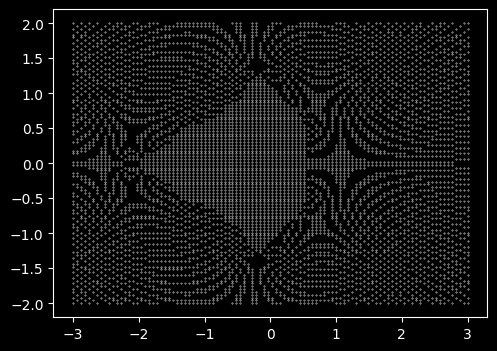

In [26]:
m = Mandelbrot(c_density=100, x0=0)
m.run()
m.plot(width=4, s=.1)

In [28]:
def mandelbrot(c, max_iter):
    z = c
    for i in range(max_iter):
        if abs(z) > 2.0:
            return i
        z = z * z + c
    return max_iter

def create_mandelbrot(width, height, xmin, xmax, ymin, ymax, max_iter):
    image = np.zeros((height, width))
    for x in range(width):
        for y in range(height):
            real = xmin + x * (xmax - xmin) / (width - 1)
            imag = ymin + y * (ymax - ymin) / (height - 1)
            c = complex(real, imag)
            color = mandelbrot(c, max_iter)
            image[y, x] = color / max_iter
    return image

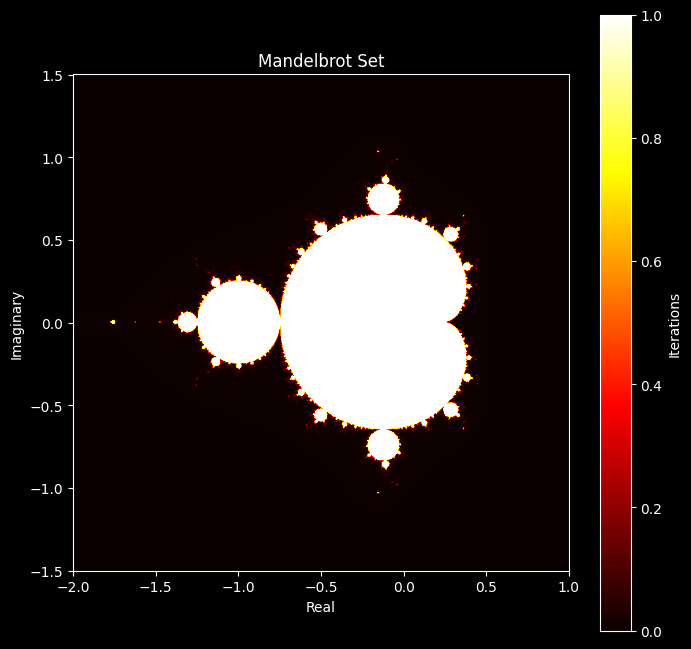

In [27]:
# Set parameters
width, height = 800, 800
xmin, xmax = -2.0, 1.0
ymin, ymax = -1.5, 1.5
max_iterations = 1000

# Generate Mandelbrot set
mandelbrot_image = create_mandelbrot(width, height, xmin, xmax, ymin, ymax, max_iterations)

# Plot Mandelbrot set
plt.figure(figsize=(8, 8))
plt.imshow(mandelbrot_image, cmap='hot', extent=(xmin, xmax, ymin, ymax))
plt.title('Mandelbrot Set')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.colorbar(label='Iterations')
plt.show()
